Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [32]:
NAME = "양동훈"
COLLABORATORS = "python"

---

# Exercise: Integration and Differentiation
**강좌**: *Numerical Analysis*

**Due**: 2024/12/5

## Problem #1

Write Python code to implement the following numerical integration methods:  
- Develop a function to approximate the integral of a given function using the composite trapezoidal rule.  
- Develop a function to approximate the integral of a given function using Simpson's 1/3 rule.  

- Input parameters 
  * Function *f* to be integrated.  
  * Integration bounds *a* (lower limit) and *b* (upper limit).  
  * Number of subintervals *n* (must be even for Simpson's rule).
    
- Additionally, include a proper docstring to describe the function's behavior, parameters, and return values.

In [33]:
# Write trapezoid rule
import numpy as np
def trapezoid(f, a, b, n):
    # YOUR CODE HERE
    """
    parameters 
    ----------
    f : function 
        적분할 함수
    a : float
        interval start value
    b : float 
        interval end value
    n : int
        spilt interval value
    """
    fa, fb = f(a), f(b)
    delta =b-a
    I = delta/(2*n)*(fa + 2*sum([f(a+delta/n*i) for i in range(1,n)]) + fb)

    return I

In [34]:
# Write Simpson 1/3 rule
def simpson(f, a, b, n):
    # YOUR CODE HERE
    """
    parameters 
    ----------
    f : function 
        적분할 함수
    a : float
        interval start value
    b : float 
        interval end value
    n : int
        spilt interval value
    """
    fa, fb = f(a), f(b)
    delta = b-a
    spot = [a + (b-a)/n*i for i in range(1,n)]
    I = delta/(3*n)*(fa + 4*sum(f([xi for xi in spot[0::2]])) + 2*sum(f([xi for xi in spot[1::2]])) + fb)
    # print(spot)
    return I
# f = np.cos
# a, b = 0, np.pi/2

# simpson(f, a, b, 10)

In [35]:
import numpy as np

# test problem
f = np.cos
a, b = 0, np.pi/2

# exact integration on [a, b]
Ie = 1.0

# Verification
assert(abs(trapezoid(f, a, b, 10) - Ie) < 1e-2)
assert(abs(simpson(f, a, b, 10) - Ie) < 1e-5)

## Problem #2
Derive the finite difference formula to approximate the first derivative $f'(x)$ using the function values at points $f_{i+2}$, $f_{i+1}$, and $f_i$.  

1. **Derivation:**  
   - Use Taylor series expansions to derive the finite difference formula for $f'(x)$ with the best possible accuracy.
   - Clearly show the step-by-step process.  

2. **Implementation:**  
   - Write a Python function to compute the first derivative at $x_i$ using the derived formula.  

3. **Validation:**  
   - Test your formula and implementation by approximating the derivative of $f(x) = \sin(x)$ at $x = 0$ using a step size $h = 0.1, 0.05, 0.025$.  
   - Compare the result with the exact derivative, $f'(x) = \cos(x)$.  
   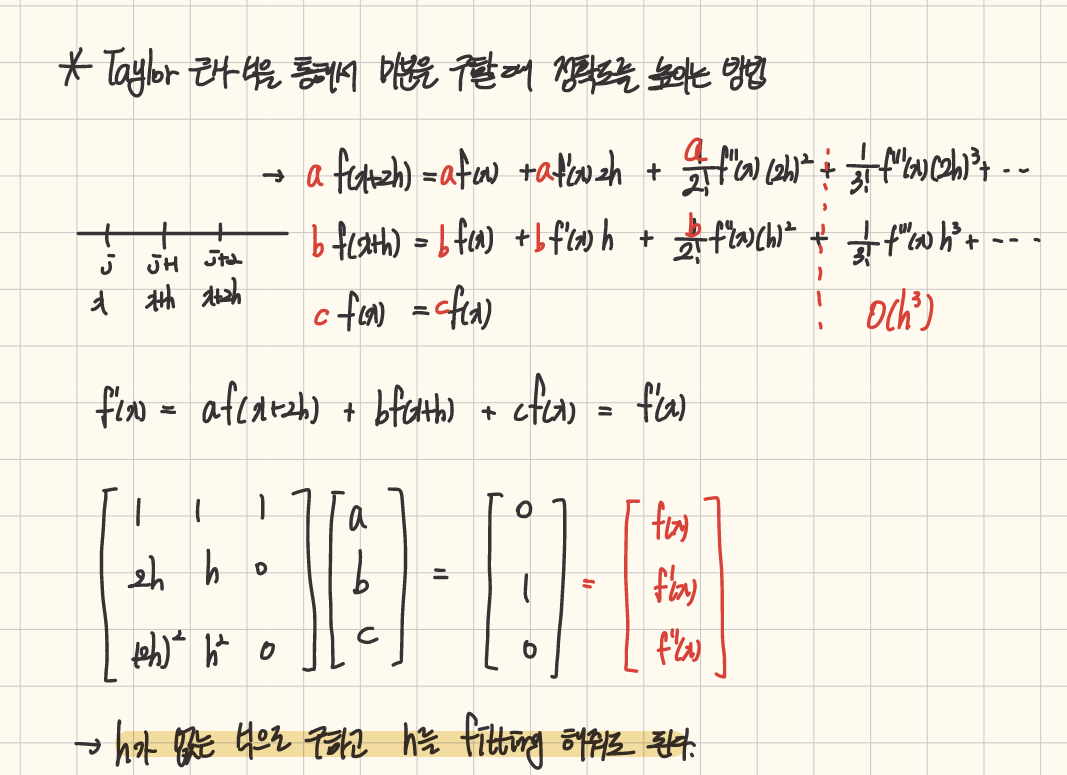

In [36]:
# Write your answer
# 정확도를 3차까지 높이기 위해서 다음과 같은 방법을 사용한다.

def df(f, x, h):
    """
    f : function
    x : float
    h : float
        step size
    """
    # YOUR CODE HERE
    A = np.array([[1, 1, 1],
                  [2*h, h, 0],
                  [(2*h)**2, h**2,0]])
    b = np.array([0, 1, 0])

    coef = np.linalg.solve(A,b)

    df = coef[0]*f(x+2*h) + coef[1]*f(x+h) + coef[2]*f(x)

    return df

In [37]:
# Check your result
hs = [0.1, 0.05, 0.25]
f = np.sin

assert abs(df(f, 0, hs[0]) - 1.003321) < 1e-6
assert abs(df(f, 0, hs[1]) - 1.000832) < 1e-6
assert abs(df(f, 0, hs[2]) - 1.020380) < 1e-6

## Problem #3
Recall that the velocity of the freefalling parachutist with linear drag can be computed analytically as

$v(t) = \frac{gm}{c}(1 - e^{-(c/m)t})$

where $v(t)$ = velocity (m/s), $t$ = time (s), $g$ = 9.81 m/s2, $m$ = mass (kg), $c$ = linear drag coefficient (kg/s). 

Use Romberg integration to compute how far the jumper travels during the first 8 seconds of free fall given $m$ = 80 kg and $c$ = 10 kg/s. 

Compute the answer to $\epsilon_{t}$ =1%.

In [42]:
# Write your answer
# Save the result in ans_a
# YOUR CODE HERE
g = 9.81
m = 80
c = 10 

v = lambda t : g*m/c*(1-np.exp(-c/m*t))
h = lambda t : g*m/c*(t+m/c*np.exp(-c/m*t)) #exact 적분값을 구하기 위해서
exact = h(8)-h(0)

def trapezoid(f, a, b, n):
    # YOUR CODE HERE
    """
    parameters 
    ----------
    f : function 
        적분할 함수
    a : float
        interval start value
    b : float 
        interval end value
    n : int
        spilt interval value
    """
    fa, fb = f(a), f(b)
    delta =b-a
    I = delta/(2*n)*(fa + 2*sum([f(a+delta/n*i) for i in range(1,n)]) + fb)

    return I

def romberg_integration(f, x0, xf, tol = 1e-2, max_iter = 100) :
    Iii = np.zeros((max_iter, max_iter))
    n = 1
    h = (xf-x0)/n
    Iii[0,0] = trapezoid(f, x0, xf, n)

    for i in range(1, max_iter) :
        n *= 2
        Iii[i, 0] = trapezoid(f, x0, xf, n)

        for j in range(1, i+1) :
            Iii[i, j] = (4**(j)*Iii[i,j-1] - Iii[i-1, j-1])/(4**(j)-1)
        #본래는 다 비교하는게 맞지만 대각값만 비교해도 충분하다.
        if abs((Iii[i,i] - Iii[i-1,i-1])/ (Iii[i-1, i-1])) < tol  :
            return Iii[i, i]
ans_a = romberg_integration(v, 0, 8)
print(ans_a)

230.96922983477413


In [ ]:
# Do not remove!!

## Problem #4

The objective of this problem is to compare first-order accurate forward, backward, and second-order centered finite-difference approximations of the second derivative of a function to the actual value of the derivative. 

This will be done for

$f(x)=e^{-2x}-x$

- (a) Use calculus to determine the correct value of the second derivative at $x$ = 2.
- (b) To evaluate the second-derivative centered finite-difference approximations, start with  $\Delta x = 0.1$. Thus, for the first evaluation, the x values for the centered difference approximation will be $x$ = 1.9 and 2.1. Then, decrease in increments of 0.01 down to a minimum value of $\Delta x$ = 0.01.

- (c) Repeat (b) the second-derivative forward and backward differences. (Note that these can be done at the same time that the centered difference is computed in the loop.)
- (d) Plot the results of (b) and (c) versus x. Include the exact result on the plot for comparison.

In [ ]:
# Write your answer (a)
# Save the result in ans_a
# YOUR CODE HERE

f = lambda x : np.exp(-2*x) - x
second_derivative2 = lambda x : 4*np.exp(-2*x)
#a
ans_a = second_derivative2(2) # x=2에서의 이계도함수의 exact value

#b
def central_second_difference(f, x, dx) : #central difference를 이용해서 이계도함수를 구하는 함수
    '''
    parameters
    -----------
    f : function
        이계도함수를 구하고자 하는 함수
    x : float
        구하는 위치
    dx : float
    '''
    cf2 = (f(x+dx) - 2*f(x) + f(x-dx))/dx**2

    return cf2

dx_value = np.arange(0.1, 0.01 - 0.001, -0.01)  # 0.01까지 포함되도록 0.001을 뺌
ans_b = []
for i in dx_value :
    result = central_second_difference(f,2,i)
    ans_b.append(result)

#c
def forward_second_difference(f, x, dx) :
    '''
    parameters
    -----------
    f : function
        이계도함수를 구하고자 하는 함수
    x : float
        구하는 위치
    dx : float
    '''
    ff2 = (f(x+2*dx)-2*f(x+dx)+f(x))/dx**2

    return ff2

def backward_second_difference(f, x, dx) :
    '''
    parameters
    -----------
    f : function
        이계도함수를 구하고자 하는 함수
    x : float
        구하는 위치
    dx : float
    '''
    bf2 = (f(x-2*dx)-2*f(x-dx)+f(x))/dx**2

    return bf2

dx_value = np.arange(0.1, 0.01 - 0.001, -0.01)  # 0.01까지 포함되도록 0.001을 뺌
ans_c_forward = [] #forward 방식으로 구한 값들을 저장
ans_c_backward = [] #backward 방식으로 구한 값들을 저장
for i in dx_value :
    result_f = forward_second_difference(f,2,i)
    result_b = backward_second_difference(f,2,i)
    ans_c_forward.append(result_f)
    ans_c_backward.append(result_b)

print(ans_a)
print(ans_b)
print(ans_c_backward)
print(ans_c_forward)
print(dx_value)

0.07326255555493671
[np.float64(0.07350708991751274), np.float64(0.07346057821221728), np.float64(0.07341898243817116), np.float64(0.07338229593565969), np.float64(0.07335051283166268), np.float64(0.07332362803893479), np.float64(0.07330163725435809), np.float64(0.07328453695887285), np.float64(0.07327232441622888), np.float64(0.07326499767090693)]
[np.float64(0.08978176236953404), np.float64(0.08794827974057524), np.float64(0.08615797402838211), np.float64(0.08440973231480244), np.float64(0.08270247227949562), np.float64(0.08103514131647661), np.float64(0.07940671567716037), np.float64(0.07781619964002867), np.float64(0.07626262470361543), np.float64(0.0747450488014493)]
[np.float64(0.060182515084683516), np.float64(0.06135943269365613), np.float64(0.0625635298769078), np.float64(0.06379550330407893), np.float64(0.06505606887406849), np.float64(0.06634596227570447), np.float64(0.06766593956680765), np.float64(0.0690167777688758), np.float64(0.0703992754813584), np.float64(0.0718142535

In [ ]:
# Do not remove!!

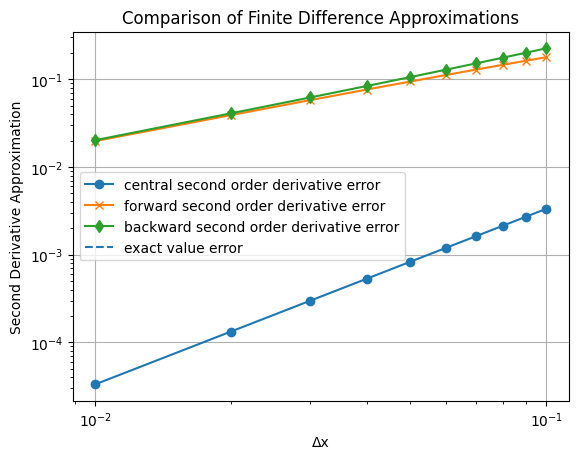

In [ ]:
# Write your answer (d)
# YOUR CODE HERE
from matplotlib import pyplot as plt

plt.loglog(dx_value, abs(ans_b-ans_a)/ans_a, label = 'central second order derivative error', marker = 'o')
plt.loglog(dx_value, abs(ans_c_forward-ans_a)/ans_a, label = 'forward second order derivative error', marker = 'x')
plt.loglog(dx_value, abs(ans_c_backward-ans_a)/ans_a, label = 'backward second order derivative error', marker = 'd')
plt.axhline(y=ans_a-ans_a, label = 'exact value error', linestyle ='--')

plt.xlabel('Δx')
plt.ylabel('Second Derivative Approximation')
plt.title('Comparison of Finite Difference Approximations')
plt.legend()
plt.grid(True)
plt.show()

#forward와 backward는 1차 정확도로 2차 정확도인 central보다 오차가 더 큼을 볼 수 있고, 오차는 Δx의 크기에 결정되는 데 Δx가 작아질 수록 오차가 줄어듦을 볼 수 있다.|